# Assignment 1
# Gradient Descent & Types of Gradient Desce

**Gradient Descent:**

Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning and deep learning models. It iteratively adjusts the model parameters to find the values that minimize the cost function.

**Types of Gradient Descent:**

**1. Batch Gradient Descent:**

It is also known as vanilla gradient descent. It uses the entire training dataset to compute the gradient of the cost function. It can be computationally expensive for large datasets.

**2. Stochastic Gradient Descent (SGD):**

It updates the model parameters using only one training example at a time.
SGD is faster but introduces more noise into the gradient updates an it can escape local minima due to its noisy updates.

**3. Mini-batch Gradient Descent:**

A compromise between batch gradient descent and stochastic gradient descent.
Uses a small random subset of the training data (mini-batch) to compute the gradient.
Balances the efficiency of batch gradient descent with the noise reduction of stochastic gradient descent.

# Validation Set and Validation Loss

**Validation Set:**

A validation set is a subset of the dataset that is not used during training but is used to evaluate the model's performance during training.
Helps in tuning hyperparameters and selecting the best model.
Prevents overfitting by providing a check on the model's performance on unseen data.


**Validation Loss:**

Validation loss is the error calculated on the validation set.
Indicates how well the model is performing on data that it has not seen during training.
A significant difference between training loss and validation loss can indicate overfitting or underfitting.

**Some Key Points:**

- During training, the model parameters are adjusted to minimize the training loss.
- Validation loss is monitored to ensure that the model generalizes well to new, unseen data.
- Early stopping and cross-validation are techniques that use validation loss to improve model performance and prevent overfitting.

# MLP Model Creation

## Importing Required Libraries

In [28]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.metrics import accuracy_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# Load and Process the data from seaborn

In [29]:
tips = sns.load_dataset('tips')

In [30]:
# Convert categorical variables to dummy values
tips = pd.get_dummies(tips, drop_first=True)

In [31]:
# Separate features and target variable (pridicting 'tips' based on others ffeatures)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build the Model

In [44]:
# Building the model
model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), 
     # Hidden layer
    tf.keras.layers.Dense(32, activation='relu'), 
    # Output layer for regression (by default linear activation function)
    tf.keras.layers.Dense(1)  
])

## Compile the model using Early stopping epochs

In [45]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Define the callback function
early_stopping = EarlyStopping(patience=5)

## Train the model

In [46]:
# # Training the model
# model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

In [47]:
# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 11.4561 - val_loss: 7.2819
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.4177 - val_loss: 5.7730
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.1195 - val_loss: 4.4433
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.5375 - val_loss: 3.3038
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.9424 - val_loss: 2.4026
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.5604 - val_loss: 1.7861
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.2736 - val_loss: 1.4369
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.3176 - val_loss: 1.3246
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.6668 - val_loss: 1.2909
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5596 - val_loss: 1.2818
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4979 - val_loss: 1.2834
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2575 - val_l

## Evaluate the model

In [48]:
# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

1.1050125360488892

## Plotting

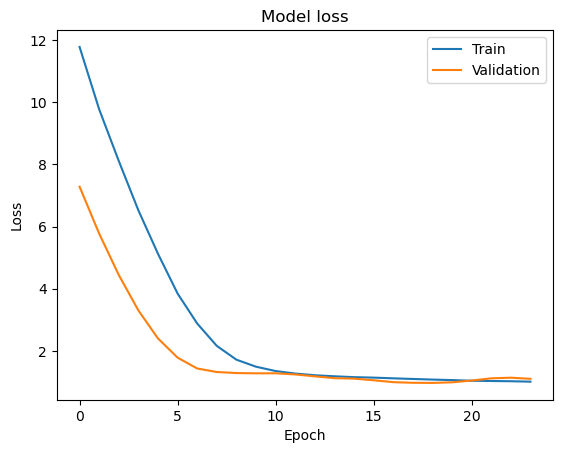

In [50]:
# Plotting the training and testing loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()